In [1]:
from lib import *
from features import *

[nltk_data] Downloading package punkt to /home/shashi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/shashi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# importing data

In [2]:
data = pd.read_csv('./train_data.csv')

In [3]:
#data = data.sample(frac=0.4).reset_index(drop=True)
size = data.shape
size

(211209, 3)

# Data Visualisation
#showing data distribution over the four categories of headlines
m-Medical
e-Entertainment
b-Bussiness
t-Tech

(array([53966.,     0.,     0., 58093.,     0.,     0., 76264.,     0.,
            0., 22886.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

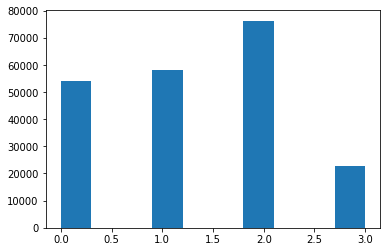

In [4]:
plt.hist(data.CATEGORY.factorize()[0])

In [5]:
data.CATEGORY.factorize()[1]

Index(['t', 'b', 'e', 'm'], dtype='object')

# Data  samples

In [6]:
data.head()

,ID,TITLE,CATEGORY
0,226435,Google+ rolls out 'Stories' for tricked out ph...,t
1,356684,Dov Charney's Redeeming Quality,b
2,246926,White God adds Un Certain Regard to the Palm Dog,e
3,318360,"Google shows off Androids for wearables, cars,...",t
4,277235,China May new bank loans at 870.8 bln yuan,b


In [7]:
# Processed 211209 records stored in NormalizedText.csv
# for line,i in zip(data['TITLE'],range(data['TITLE'].shape[0])):
#     data.loc[i,('TITLE')] = normalise_text(line)

In [13]:
data = pd.read_csv('NormalizedText.csv')
data = data.dropna()

In [14]:
transformer = Transformer()

In [15]:
cv, tv, processed_data = transformer.fit_transform(data.TITLE)

In [16]:
categories = data.CATEGORY.factorize()[0]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(processed_data, categories)

In [20]:
model = BernoulliNB(alpha=1.0, binarize=0.0)
model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

pickle.dump(clf, open("model.pkl", "wb"))
pickle.dump(cv, open("cv.pkl", "wb"))
pickle.dump(tv, open("tv.pkl", "wb"))

In [21]:
model.score(X_train,y_train)

0.9361068148101386

In [22]:
model.score(X_test,y_test)

0.9237150107950456

In [23]:
url = "http://www.bbc.com/"
#url = "https://in.yahoo.com/?p=us"
headlines = extract_hedlines(url)

In [24]:
for lines, i in zip(headlines, range(len(headlines))):
    headlines[i] = normalise_text(lines)

In [25]:
testing_headlines = pd.DataFrame({"TITLE":headlines})

In [26]:
processed_testing_data = transformer.transform(testing_headlines.TITLE)

In [28]:
prediction = model.predict(processed_testing_data)

In [29]:
for i in range(testing_headlines['TITLE'].shape[0]):
    if(len(testing_headlines.TITLE[i])>20):
        print(testing_headlines.TITLE[i]," ",data.CATEGORY.factorize()[1][prediction[i]])

philip hammond tells bbc plans resign theresa may leaves office next week   t
recording royal navy frigate heard warning iran obstruct tanker   b
hundreds firefighters deployed tackle blazes fanned strong winds   b
images bianca devins death widely shared online experts say exposed bigger problem .   m
real madrid wales forward fallen favour head coach zinedine zidane looks set leave club   e
manny pacquiao beats keith thurman points become wba welterweight super champion age 40   e
follow live text coverage listen bbc radio 5 live commentary irelands shane lowry takes fourshot lead final round .   e
new home amazing bbc video content   e
study suggests people likely hand cashfilled wallet rather empty one .   m
tiger found shelter house floods ravage kaziranga national park indias assam state   m
samson dsouza found guilty culpable homicide amounting murder '' indian court .   e
flood waters submerge homes roads railway lines cutting whole districts .   b
demand meat products high ind

In [30]:
model.predict_proba(processed_testing_data[0])

array([[0.53500911, 0.04431073, 0.41513684, 0.00554332]])

In [31]:
model.classes_

array([0, 1, 2, 3])

In [32]:
model.predict(processed_data[0])

array([0])